#### Copyright 2020 Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Documentation links:

- [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb)
- [Numpy](https://docs.scipy.org/doc/)
- [Pandas](https://pandas.pydata.org/docs/getting_started/index.html)
- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Matplotlib](https://matplotlib.org/)
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn](https://seaborn.pydata.org/)
- [Scikit-learn](https://scikit-learn.org/stable/user_guide.html)
- [Scikit-learn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [Scikit-learn Flow Chart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

# Classification with Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load data

In [2]:
url = "https://raw.githubusercontent.com/zerotodeeplearning/ztdl-masterclasses/master/data/"

In [3]:
df = pd.read_csv(url + 'geoloc_elev.csv')

### Exploration

In [4]:
df.head()

,lat,lon,elev,source,target
0,0.106264,0.068264,0.542477,S,1
1,0.099569,0.132094,0.722289,C,1
2,-0.775751,-0.814161,0.214760,S,0
3,-0.159833,0.040773,0.478576,S,1
4,-0.096395,0.021420,0.270322,C,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     1500 non-null   float64
 1   lon     1500 non-null   float64
 2   elev    1500 non-null   float64
 3   source  1500 non-null   object 
 4   target  1500 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 58.7+ KB


In [6]:
df['source'].value_counts()

C    555
Q    476
S    469
Name: source, dtype: int64

In [7]:
df['target'].value_counts()

0    1000
1     500
Name: target, dtype: int64

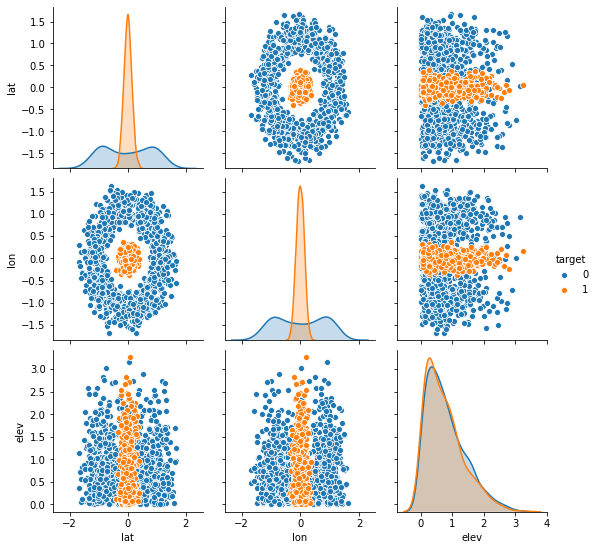

In [8]:
sns.pairplot(df, hue='target');

### Features and Labels

In [9]:
y = df['target']

In [10]:
raw_features = df.drop('target', axis=1)

# 1-hot encoding of categorical column "source"
X = pd.get_dummies(raw_features)

X.head()

,lat,lon,elev,source_C,source_Q,source_S
0,0.106264,0.068264,0.542477,0,0,1
1,0.099569,0.132094,0.722289,1,0,0
2,-0.775751,-0.814161,0.214760,0,0,1
3,-0.159833,0.040773,0.478576,0,0,1
4,-0.096395,0.021420,0.270322,1,0,0


### Model training and evaluation

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.3, random_state=0)

In [13]:
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [14]:
y_pred = model.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

,pred_Miss,pred_Hit
Miss,285,26
Hit,6,133


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       311
           1       0.84      0.96      0.89       139

    accuracy                           0.93       450
   macro avg       0.91      0.94      0.92       450
weighted avg       0.94      0.93      0.93       450



### Decision Boundary

In [17]:
def plot_decision_boundary(model):
  hticks = np.linspace(-2, 2, 101)
  vticks = np.linspace(-2, 2, 101)

  aa, bb = np.meshgrid(hticks, vticks)
  a_flat = aa.ravel()
  b_flat = bb.ravel()
  N = len(a_flat)

  zeros = np.zeros((N, 4))
  ab = np.c_[a_flat, b_flat, zeros]

  c = model.predict(ab)

  cc = c.reshape(aa.shape)
  plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)

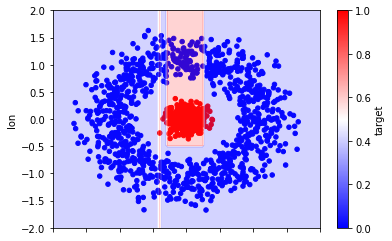

In [18]:
df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')

plot_decision_boundary(model)

## Exercise 1


Iterate and improve on the decision tree model. Now you have a basic pipeline example. How can you improve the score? Try some of the following:

1. change some of the initialization parameters of the decision tree re run the code.
    - Does the score change?
    - Does the decision boundary change?
2. try some other model like Logistic Regression, Random Forest, SVM, Naive Bayes or any other model you like from [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
3. what's the highest score you can get?

An easy way to achieve all of the above is to define a function that trains and evaluates the model like this one:


```python
def train_eval(model):
  # YOUR CODE HERE
  
```

and then loop over a list of models:

```python
models = [...]

for model in models:
  train_eval(model)
```

Bonus points if you also measure the time it takes for each model to train

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from time import time

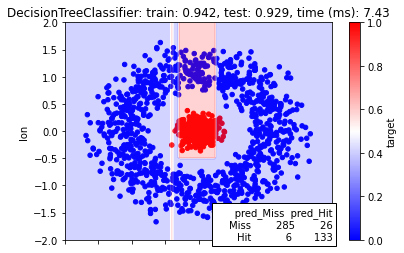

In [20]:
def pretty_cm(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)

  cmdf = pd.DataFrame(cm,
                      index=["Miss", "Hit"],
                      columns=['pred_Miss', 'pred_Hit'])
  return cmdf

def train_eval(model):
  t0 = time()
  model.fit(X_train.values, y_train)
  t1 = time()

  y_pred_train = model.predict(X_train.values)
  y_pred_test = model.predict(X_test.values)

  train_acc = accuracy_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)

  cmdf = pretty_cm(y_test, y_pred_test)
  res = "{}: train: {:0.3}, test: {:0.3}, time (ms): {:0.3}".format(
      model.__class__.__name__, 
      train_acc,
      test_acc,
      1000*(t1 - t0))
  
  df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
  
  plot_decision_boundary(model)

  plt.title(res)
  
  plt.text(2, -2,
           str(cmdf),
           horizontalalignment='right',
           bbox={'facecolor':'white'})
  plt.show()


train_eval(model)

In [21]:

models = [DecisionTreeClassifier(max_depth=3),
          DecisionTreeClassifier(max_depth=6),
          RandomForestClassifier(),
          ExtraTreesClassifier(),
          GaussianNB(),
          LogisticRegression(),
          XGBClassifier(),
          SVC(),
          MLPClassifier(),
          ]

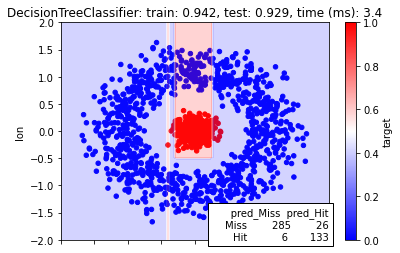

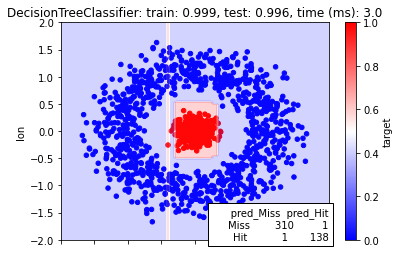

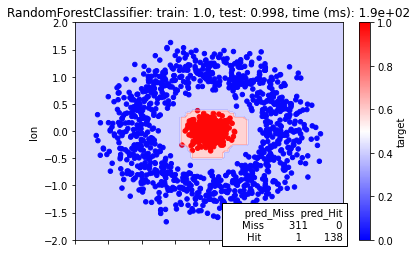

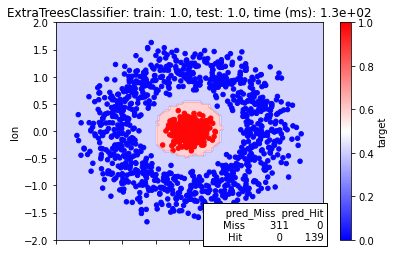

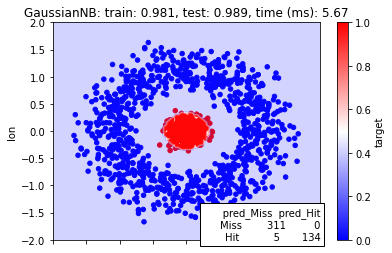

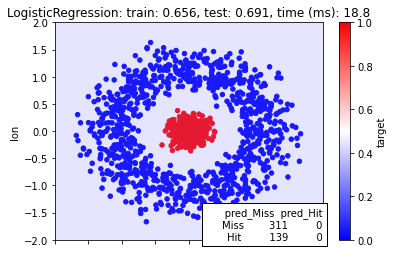

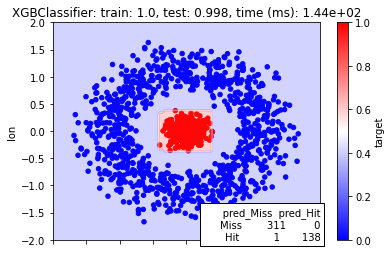

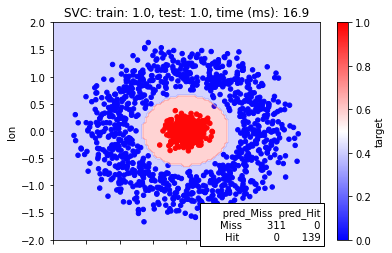

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


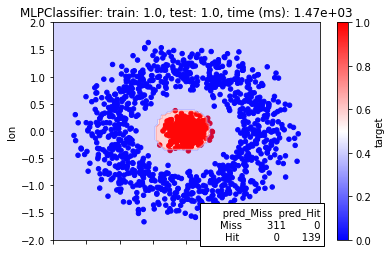

In [22]:

for model in models:
  train_eval(model)

### Exercise 2


- load the churn dataset `churn.csv`
- assign the `Churn` column to a variable called `y`
- assign the other columns to a variable called `features`
- select numerical columns with `features.select_dtypes` and asign them to a variable called `X`
- split data into train/test with test_size=0.3 and random_state=42
- modify the `train_eval` function defined earlier to test and compare different models and hyperparameters combinations.

You can find a list of models available [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).


In [23]:
df = pd.read_csv(url + 'churn.csv')

In [24]:

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,Nophoneservice,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electroniccheck,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Oneyear,No,Mailedcheck,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailedcheck,53.85,108.15,Yes
3,Male,0,No,No,45,No,Nophoneservice,DSL,Yes,No,Yes,Yes,No,No,Oneyear,No,Banktransfer(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiberoptic,No,No,No,No,No,No,Month-to-month,Yes,Electroniccheck,70.70,151.65,Yes


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [26]:

y = df['Churn'] == 'Yes'
features = df.drop('Churn', axis=1)

In [27]:
X = features.select_dtypes(include=['number'])


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [29]:

def train_eval(model):

  model.fit(X_train.values, y_train)
  y_pred_train = model.predict(X_train.values)
  y_pred_test = model.predict(X_test.values)

  train_acc = accuracy_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)

  print("{: <25} Train: {: 0.4} Test: {: 0.4}".format(
      model.__class__.__name__,
      train_acc,
      test_acc))
  

for model in models:
  train_eval(model)

DecisionTreeClassifier    Train:  0.7864 Test:  0.7743
DecisionTreeClassifier    Train:  0.8016 Test:  0.778
RandomForestClassifier    Train:  0.9909 Test:  0.7662
ExtraTreesClassifier      Train:  0.9909 Test:  0.752
GaussianNB                Train:  0.7757 Test:  0.7785
LogisticRegression        Train:  0.7901 Test:  0.796
XGBClassifier             Train:  0.8043 Test:  0.7965
SVC                       Train:  0.7373 Test:  0.7283
MLPClassifier             Train:  0.4899 Test:  0.4998


### Exercise 3

Define a new function that also keeps track of the time required to train the model. Your new function will look like:

```python
def train_eval_time(model):
  # YOUR CODE HERE
  
  return model, train_acc, test_acc, dt
```

In [30]:
from time import time

In [31]:
def train_eval_time(model):
  t0 = time()
  model.fit(X_train.values, y_train)
  dt = time() - t0
  y_pred_train = model.predict(X_train.values)
  y_pred_test = model.predict(X_test.values)

  train_acc = accuracy_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)

  return model, train_acc, test_acc, dt
  

for model in models:
  model, train_acc, test_acc, dt = train_eval_time(model)
  print("{: <25} Train: {: 0.4}\tTest: {: 0.4}\tTrain Time: {: 0.4}".format(
      model.__class__.__name__,
      train_acc,
      test_acc,
      dt))

DecisionTreeClassifier    Train:  0.7864	Test:  0.7743	Train Time:  0.01658
DecisionTreeClassifier    Train:  0.8016	Test:  0.778	Train Time:  0.01226
RandomForestClassifier    Train:  0.9907	Test:  0.7653	Train Time:  0.7306
ExtraTreesClassifier      Train:  0.9909	Test:  0.7492	Train Time:  0.4344
GaussianNB                Train:  0.7757	Test:  0.7785	Train Time:  0.002357
LogisticRegression        Train:  0.7901	Test:  0.796	Train Time:  0.05226
XGBClassifier             Train:  0.8043	Test:  0.7965	Train Time:  0.2551
SVC                       Train:  0.7373	Test:  0.7283	Train Time:  0.6213
MLPClassifier             Train:  0.7714	Test:  0.7847	Train Time:  0.6131


In [32]:
%%timeit
train_eval_time(models[0])

100 loops, best of 3: 7.22 ms per loop
